## Explainable RAG with GPT-4o-mini

In [1]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/Users/kevin/Desktop/NLP_IW/bert_nongpu/Phishing_Email.csv")

# Assuming the dataset has columns 'Email Text' and 'Label' (1 for phishing, 0 for not phishing)
X = data['Email Text']
y = data['Email Type'].str.lower().str.strip().apply(lambda x: 1 if x == 'phishing email' else 0)

# Split into train and test sets (80% train, 20% test)
_, X_test, _, y_test = train_test_split(X, y, test_size=0.015, random_state=10)
y_pred = []

In [3]:
from gpt_explainable_retrieval import ExplainableRetriever

# Add this
texts = [
    "Example phishing emails can be like:\n"
    "Subject: Urgent Action Required\n"
    "Dear User, your account has been compromised. Please reset your password immediately using the link below:\n"
    "http://fakebank.com/reset-password",
    
    "Example phishing emails can be like:\n"
    "Subject: Confirm Your Account\n"
    "We noticed suspicious activity on your account. Click the link below to verify your identity:\n"
    "http://maliciouslink.com/verify-account",
    
    "Example phishing emails can be like:\n"
    "Subject: Payment Overdue\n"
    "Your last payment was not processed. To avoid service disruption, please update your payment details now:\n"
    "http://phishing-site.com/payment-update",
    
    "Example phishing emails can be like:\n"
    "Subject: You Won a Prize!\n"
    "Congratulations! You've won a $1,000 gift card. Claim your reward by clicking the link below:\n"
    "http://fakeprize.com/claim",
    
    "Example phishing emails can be like:\n"
    "Subject: Tax Refund Notification\n"
    "You are eligible for a tax refund of $500. Submit your information here to receive the payment:\n"
    "http://phishingscam.com/tax-refund"
]

# Initialize the ExplainableRetriever with curated texts
explainable_retriever = ExplainableRetriever(texts)


for idx, email_text in enumerate(X_test):
    # Initialize explainable RAG method with train texts
    # Test query
    query = f'Is the following email a phishing email? Note, if it is safe do not add any reasoning. : {email_text}'
    # Run the explainable RAG method
    results = explainable_retriever.retrieve_and_explain(query)
    print(idx, results[0]['explanation'], '\n')
    if 'not phishing' in results[0]['explanation']:
        pred = 0  # Not phishing
    else:
        pred = 1  # Phishing
    y_pred.append(pred)

/Users/kevin/Desktop/NLP_IW/llm/gpt_explainable_retrieval.py:9: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  self.embeddings = OpenAIEmbeddings()
/Users/kevin/Desktop/NLP_IW/llm/gpt_explainable_retrieval.py:32: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  docs = self.retriever.get_relevant_documents(query)


0 The email content provided contains several characteristics commonly associated with phishing attempts. It uses vague language ("candy super $ money maker") and includes an opt-in statement that is often a tactic to make the email seem legitimate. Additionally, the request to unsubscribe by sending an email to a generic support address raises red flags, as legitimate companies typically provide a clear and secure method for opting out. The lack of specific details about the sender or the offers being promoted further suggests that this email is not trustworthy.

Based on the context and the characteristics of the email, it is considered phishing.

(phishing) 

1 The email content provided does not exhibit typical characteristics of phishing. It appears to be a professional communication regarding meetings and agreements related to financial and legal matters, with specific names and details about the agenda. There are no requests for sensitive information, no urgent threats, and no s

In [6]:
def create_classification_report(Y_test, Y_pred):
    print('--------Classification Report---------\n')
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)
    metrices = [accuracy, f1, precision, recall, roc_auc]
    scores = pd.DataFrame(pd.Series(metrices).values, index=['accuracy', 'f1-score', 'precision', 'recall', 'roc auc score'], columns=['score'])
    print(scores)
    print('\n--------Plotting Confusion Matrix---------')
    sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='RdYlGn_r', annot_kws={'size': 16})
    return scores

--------Classification Report---------

                  score
accuracy       0.825000
f1-score       0.713450
precision      0.983871
recall         0.559633
roc auc score  0.776893

--------Plotting Confusion Matrix---------
3827     1
936      0
16699    0
12994    1
10162    0
        ..
7379     0
3365     0
18260    0
15864    1
470      0
Name: Email Type, Length: 280, dtype: int64 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

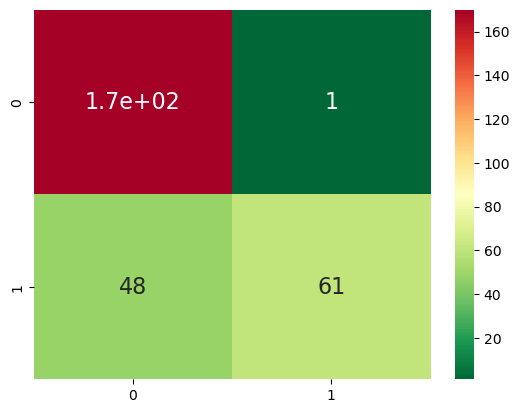

In [7]:
create_classification_report(y_test, y_pred)

print(y_test, y_pred)

In [8]:

results_df = pd.DataFrame({"y_test": y_test.values, "y_pred": y_pred})

# Save the DataFrame to a CSV file
results_df.to_csv("/Users/kevin/Desktop/NLP_IW/llm/gptnorag.csv", index=False)

--------Classification Report---------

                  score
accuracy       0.846429
f1-score       0.757062
precision      0.985294
recall         0.614679
roc auc score  0.804415

--------Plotting Confusion Matrix---------


,score
accuracy,0.846429
f1-score,0.757062
precision,0.985294
recall,0.614679
roc auc score,0.804415


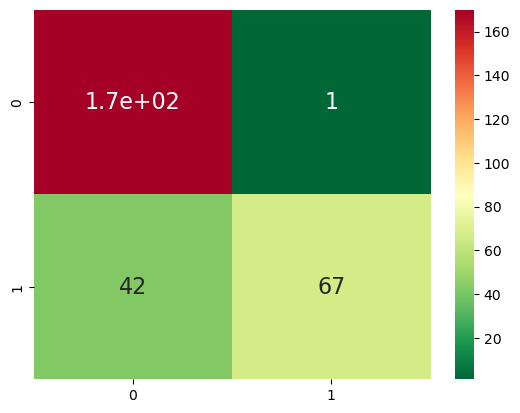

In [10]:
df = pd.read_csv("gptrag.csv")

y_test = df['y_test']
y_pred = df['y_pred']
create_classification_report(y_test, y_pred)